<h4>Abeeha</h4>
<br>
<h4>L1F18BSCS7204</h4>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

<h5>Reading Dataset</h5>

In [7]:
path = "heart_failure.csv" 

In [8]:
heartdf = pd.read_csv(path) # Read csv file?
heartdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<h5>Checking for missing Values in  Dateset</h5>

In [9]:
heartdf.isnull().sum()#We dont have Null values in our Dataset so we dont need to do Data-Wrangling

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
heartdf.dtypes #Checking DataType of Dataset Columns our data is Normalized we dont need to change or normalize data types

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<h3>Drop Time Column</h3>

In [11]:
heartdf.drop(['time'], axis='columns', inplace=True)
heartdf.reset_index(drop=True, inplace=True)
heartdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [12]:
print("Shape of data: ",heartdf.shape)#It shows shape (no of rows and column)

Shape of data:  (299, 12)


<h4>Question no 1<br>At what age most of the death event happens in heart attack 
patients?</h4>

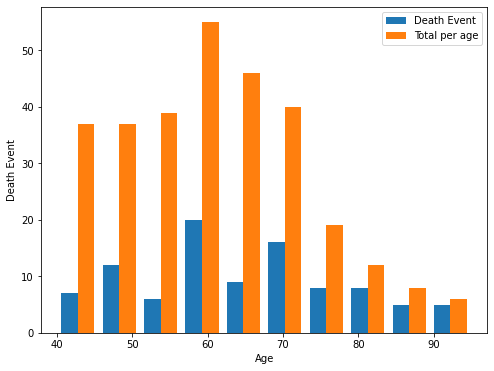

In [13]:
attack = heartdf[heartdf['DEATH_EVENT'] == 1].age
age = heartdf.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([attack, age], label=['Death Event', 'Total per age'])
plt.legend()

<h6>From Histogram we conclude that most of the Death Events Occurs at the Age of 60 </h6><br>

<h4>Question no 2<br>What is the proportion of Death events in patients who had, diabetes 
and high blood pressure?</h4>

<AxesSubplot:xlabel='diabetes', ylabel='count'>

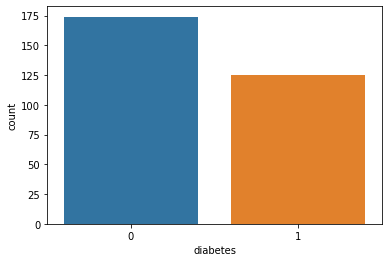

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(heartdf['diabetes'])#Diabetes - 0 = No, 1 = Yes

<AxesSubplot:xlabel='diabetes', ylabel='age'>

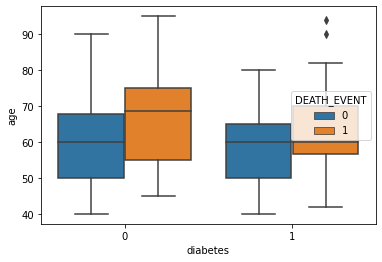

In [15]:
sns.boxplot(x='diabetes', y="age", hue = "DEATH_EVENT", data=heartdf)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

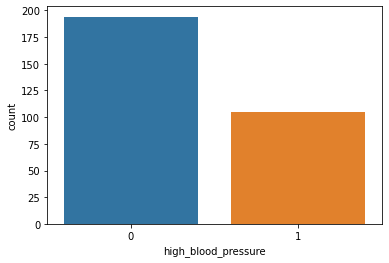

In [16]:
sns.countplot(heartdf['high_blood_pressure'])# High_blood_pressure - 0 = No, 1 = Yes

<AxesSubplot:xlabel='high_blood_pressure', ylabel='serum_sodium'>

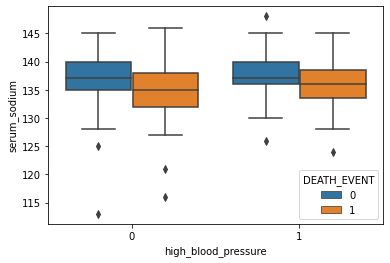

In [17]:
sns.boxplot(x='high_blood_pressure', y="serum_sodium",hue = 'DEATH_EVENT', data=heartdf)

<h4>Question no 3<br>In which Gender Death Event occur Most?
</h4>

<AxesSubplot:xlabel='sex', ylabel='age'>

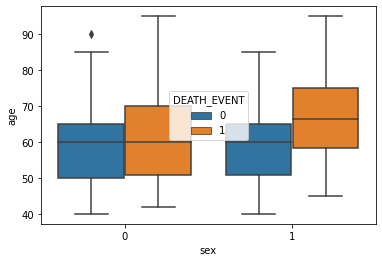

In [18]:
sns.boxplot(x='sex', y="age", hue = "DEATH_EVENT", data=heartdf)#Sex - Gender of patient Male = 1, Female =0

<h4>Question no 4<br>What are the Creatinine Phosphokinase
level of a person and chances of death event?
</h4>

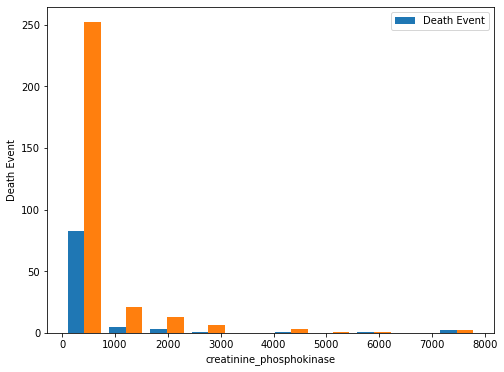

In [20]:
plat = heartdf[heartdf['DEATH_EVENT'] == 1].creatinine_phosphokinase
creatinine_phosphokinase = heartdf.creatinine_phosphokinase

plt.figure(figsize=(8,6))
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Death Event')
plt.hist([plat,creatinine_phosphokinase], label=['Death Event'])
plt.legend()

<h4>Question no 5<br>What are the Serum Sodium level for a normal person and  
death event?
</h4>


In [16]:
bins = np.linspace(min(heartdf['serum_sodium']),max(heartdf['serum_sodium']),4)
bins

array([113.        , 124.66666667, 136.33333333, 148.        ])

In [17]:
group_names = ['Low','Medium','High']

In [18]:
heartdf['serum_sodium'] = pd.cut(heartdf['serum_sodium'],bins,labels=group_names, include_lowest=True)
heartdf[['serum_sodium','serum_sodium']].head(10)

,serum_sodium,serum_sodium
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Low,Low
5,Medium,Medium
6,High,High
7,Medium,Medium
8,High,High
9,Medium,Medium


Text(0.5, 1.0, 'serum_sodium')

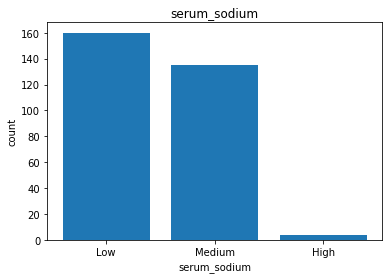

In [19]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names,heartdf['serum_sodium'].value_counts())

plt.pyplot.xlabel('serum_sodium')
plt.pyplot.ylabel('count')
plt.pyplot.title('serum_sodium')

Text(0.5, 1.0, 'serum_sodium Bining')

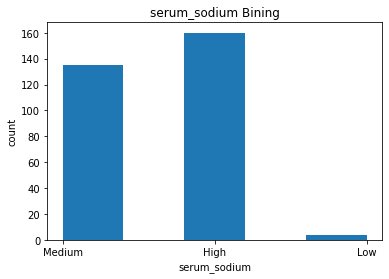

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(heartdf['serum_sodium'], bins = 5)
plt.pyplot.xlabel('serum_sodium')
plt.pyplot.ylabel('count')
plt.pyplot.title('serum_sodium Bining')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

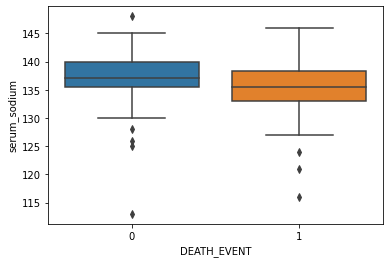

In [25]:
sns.boxplot(x='DEATH_EVENT', y="serum_sodium", data=heartdf)

<h3>Model Training</h3><br>
<h3>DecisionTree</h3>

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split




In [77]:
Features = ['age','diabetes','high_blood_pressure','sex','serum_sodium','creatinine_phosphokinase']#features
x = heartdf[Features]
x

,age,diabetes,high_blood_pressure,sex,serum_sodium,creatinine_phosphokinase
0,75.0,0,1,1,Medium,582
1,55.0,0,0,1,Medium,7861
2,65.0,0,0,1,Medium,146
3,50.0,0,0,1,High,111
4,65.0,1,0,0,Low,160
...,...,...,...,...,...,...
294,62.0,1,1,1,High,61
295,55.0,0,0,0,High,1820
296,45.0,1,0,0,High,2060
297,45.0,0,0,1,High,2413


In [78]:
y = heartdf["DEATH_EVENT"]#target
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [79]:
df = pd.DataFrame(np.c_[x,y], columns=[list(x)+['y']])
df.head()

,age,diabetes,high_blood_pressure,sex,serum_sodium,creatinine_phosphokinase,y
0,75,0,1,1,Medium,582,1
1,55,0,0,1,Medium,7861,1
2,65,0,0,1,Medium,146,1
3,50,0,0,1,High,111,1
4,65,1,0,0,Low,160,1


In [80]:
df.tail()

,age,diabetes,high_blood_pressure,sex,serum_sodium,creatinine_phosphokinase,y
294,62,1,1,1,High,61,0
295,55,0,0,0,High,1820,0
296,45,1,0,0,High,2060,0
297,45,0,0,1,High,2413,0
298,50,0,0,1,Medium,196,0


In [81]:
a = df.iloc[:, 0:-1]#is may hum features ly rahay han
b = df.iloc[:, -1]#here we take taget features

In [82]:
#split data
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=2020)
 
print('Shape of a_train = ', a_train.shape)
print('Shape of b_train = ', b_train.shape)
print('Shape of a_test = ', a_test.shape)
print('Shape of b_test = ', b_test.shape)

Shape of a_train =  (239, 6)
Shape of b_train =  (239,)
Shape of a_test =  (60, 6)
Shape of b_test =  (60,)


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit( a_train,b_train)

ValueError: could not convert string to float: 'Medium'